In [1]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

In [2]:
# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


In [3]:
# install findspark using pip
!pip install -q findspark

In [4]:
import findspark

In [5]:
findspark.init()

In [6]:
from pyspark.sql import SparkSession

In [7]:
# Create SparkSession from builder

spark1 = SparkSession.builder.master("local[*]").getOrCreate()

In [8]:
spark1

In [9]:
df1 = spark1.sql("show databases")
df1.show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [11]:
from google.colab import files
path = r'/content/drive/MyDrive/Colab Notebooks/BostonHousing.csv'
df_boston = spark1.read.csv(path, inferSchema = True, header = True)

In [12]:
df_boston.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [13]:
df_boston.count()

506

In [14]:
df_boston.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [15]:
#df_boston = df_boston.drop(df_boston.b)

In [16]:
df_boston.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [17]:
from pyspark.sql.functions import round, col

In [18]:
for cols in df_boston.columns:
  df_boston = df_boston.withColumn(cols, round(cols,2))

In [19]:
df_boston.show(5)

+----+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|     b|lstat|medv|
+----+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+
|0.01|18.0| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.03| 0.0| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 396.9| 9.14|21.6|
|0.03| 0.0| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8|392.83| 4.03|34.7|
|0.03| 0.0| 2.18|   0|0.46| 7.0|45.8|6.06|  3|222|   18.7|394.63| 2.94|33.4|
|0.07| 0.0| 2.18|   0|0.46|7.15|54.2|6.06|  3|222|   18.7| 396.9| 5.33|36.2|
+----+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+
only showing top 5 rows



In [20]:
from pyspark.sql.functions import lit

In [21]:
df_boston = df_boston.withColumn("Age10", lit(df_boston.age + (df_boston.age*0.1)))
for cols in df_boston.columns:
  df_boston = df_boston.withColumn(cols, round(cols,2))

In [22]:
df_boston.show(5)

+----+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+-----+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|     b|lstat|medv|Age10|
+----+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+-----+
|0.01|18.0| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 396.9| 4.98|24.0|71.72|
|0.03| 0.0| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 396.9| 9.14|21.6|86.79|
|0.03| 0.0| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8|392.83| 4.03|34.7|67.21|
|0.03| 0.0| 2.18|   0|0.46| 7.0|45.8|6.06|  3|222|   18.7|394.63| 2.94|33.4|50.38|
|0.07| 0.0| 2.18|   0|0.46|7.15|54.2|6.06|  3|222|   18.7| 396.9| 5.33|36.2|59.62|
+----+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+-----+
only showing top 5 rows



In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
spark1.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [25]:
spark1.sql("CREATE DATABASE BostonH")

DataFrame[]

In [26]:
df_db = spark1.sql("show databases")

In [27]:
df_db.show()

+---------+
|namespace|
+---------+
|  bostonh|
|  default|
+---------+



In [88]:
df2 = spark1.read.csv(path, inferSchema = True, header = True)

In [89]:
df2.write.mode("overwrite").saveAsTable("bostonh.bos_housing")

In [90]:
spark1.sql("select * from bostonh.bos_housing").show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

In [99]:
df_pd = df2.toPandas()
df_pd.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [32]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [33]:
df_va = df2[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']]
df_target = df2[['medv']]

In [136]:
assembler = VectorAssembler(inputCols = df2[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']].columns, outputCol='Attributes')
output = assembler.transform(df2[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat','medv']])

In [138]:
output.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+--------------------+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|          Attributes|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+--------------------+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|[0.02731,0.0,7.07...|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|[0.02729,0.0,7.07...|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|[0.03237,0.0,2.18...|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|[0.06905,0.0,2.18...|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|[0.02985,0.0,2.18...|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5

In [141]:
finalized_data = output.select("Attributes", "medv")
finalized_data.show()

+--------------------+----+
|          Attributes|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03237,0.0,2.18...|33.4|
|[0.06905,0.0,2.18...|36.2|
|[0.02985,0.0,2.18...|28.7|
|[0.08829,12.5,7.8...|22.9|
|[0.14455,12.5,7.8...|27.1|
|[0.21124,12.5,7.8...|16.5|
|[0.17004,12.5,7.8...|18.9|
|[0.22489,12.5,7.8...|15.0|
|[0.11747,12.5,7.8...|18.9|
|[0.09378,12.5,7.8...|21.7|
|[0.62976,0.0,8.14...|20.4|
|[0.63796,0.0,8.14...|18.2|
|[0.62739,0.0,8.14...|19.9|
|[1.05393,0.0,8.14...|23.1|
|[0.7842,0.0,8.14,...|17.5|
|[0.80271,0.0,8.14...|20.2|
|[0.7258,0.0,8.14,...|18.2|
+--------------------+----+
only showing top 20 rows



In [142]:
df_final.show()

+--------------------+----+
|          Attributes|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03237,0.0,2.18...|33.4|
|[0.06905,0.0,2.18...|36.2|
|[0.02985,0.0,2.18...|28.7|
|[0.08829,12.5,7.8...|22.9|
|[0.14455,12.5,7.8...|27.1|
|[0.21124,12.5,7.8...|16.5|
|[0.17004,12.5,7.8...|18.9|
|[0.22489,12.5,7.8...|15.0|
|[0.11747,12.5,7.8...|18.9|
|[0.09378,12.5,7.8...|21.7|
|[0.62976,0.0,8.14...|20.4|
|[0.63796,0.0,8.14...|18.2|
|[0.62739,0.0,8.14...|19.9|
|[1.05393,0.0,8.14...|23.1|
|[0.7842,0.0,8.14,...|17.5|
|[0.80271,0.0,8.14...|20.2|
|[0.7258,0.0,8.14,...|18.2|
+--------------------+----+
only showing top 20 rows



In [169]:
splits = df_final.randomSplit([0.75, 0.25])
train_df = splits[0]
test_df = splits[1]

In [207]:
train_df.show(2)

+--------------------+----+
|   Attributes_Scaled|medv|
+--------------------+----+
|[9.26371566416239...|24.0|
|[0.00132799468223...|32.2|
+--------------------+----+
only showing top 2 rows



In [208]:
test_df.show(2)

+--------------------+----+
|   Attributes_Scaled|medv|
+--------------------+----+
|[0.00177627271180...|31.1|
|[0.00221648295862...|34.7|
+--------------------+----+
only showing top 2 rows



In [174]:
from pyspark.mllib.feature import StandardScaler
from pyspark.ml.feature import StandardScaler

Scalerizer=StandardScaler().setInputCol("Attributes").setOutputCol("Attributes_Scaled")
Scalerizer = Scalerizer.fit(train_df).transform(train_df)
train_df = Scalerizer.select('Attributes_Scaled', 'medv')

In [183]:
Scalerizer=StandardScaler().setInputCol("Attributes").setOutputCol("Attributes_Scaled")
Scalerizer = Scalerizer.fit(test_df).transform(test_df)
test_df = Scalerizer.select('Attributes_Scaled', 'medv')

In [209]:
train_df.show(2)

+--------------------+----+
|   Attributes_Scaled|medv|
+--------------------+----+
|[9.26371566416239...|24.0|
|[0.00132799468223...|32.2|
+--------------------+----+
only showing top 2 rows



In [210]:
test_df.show(2)

+--------------------+----+
|   Attributes_Scaled|medv|
+--------------------+----+
|[0.00177627271180...|31.1|
|[0.00221648295862...|34.7|
+--------------------+----+
only showing top 2 rows



In [184]:
test_df.show()

+--------------------+----+
|   Attributes_Scaled|medv|
+--------------------+----+
|[0.00177627271180...|31.1|
|[0.00221648295862...|34.7|
|[0.00233506357861...|25.0|
|[0.00262907854051...|33.4|
|[0.00268512006640...|20.6|
|[0.00278339578570...|19.5|
|[0.00288410809309...|22.9|
|[0.00290603738583...|45.4|
|[0.00297182526405...|24.8|
|[0.00314401082184...|23.2|
|[0.00325771826567...|33.3|
|[0.00349325511360...|18.2|
|[0.00352249417059...|20.5|
|[0.00355660640374...|19.4|
|[0.00358746985277...|24.8|
|[0.00369061874825...|19.8|
|[0.00372797976551...|22.3|
|[0.00385062136563...|11.9|
|[0.00400575080686...|28.2|
|[0.00404554841220...|23.4|
+--------------------+----+
only showing top 20 rows



In [185]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

In [186]:

from pyspark.ml.regression import LinearRegression
regressor = LinearRegression(featuresCol = 'Attributes_Scaled', labelCol = 'medv')
model_reg_train = regressor.fit(train_df)

In [187]:
print("Regressor:", regressor)
print("(Fit)", model_reg_train)

Regressor: LinearRegression_d99f3769a54f
(Fit) LinearRegressionModel: uid=LinearRegression_d99f3769a54f, numFeatures=13


In [188]:
pred_results_train = model_reg_train.evaluate(train_df)
pred_results_train.predictions.show()

+--------------------+----+------------------+
|   Attributes_Scaled|medv|        prediction|
+--------------------+----+------------------+
|[9.26371566416239...|24.0| 30.09930707306624|
|[0.00132799468223...|32.2|32.159369433398076|
|[0.00160649246327...|22.0| 27.88833944711397|
|[0.00190697691124...|32.7| 30.77307893831582|
|[0.00192163468919...|35.4| 31.39224495044899|
|[0.00199345780114...|18.9|15.091098695119825|
|[0.00202423913484...|50.0|41.063665884362216|
|[0.00209899380238...|31.6|  33.2398891158903|
|[0.00210925424695...|29.1| 32.00628655951501|
|[0.00220013247023...|24.5|27.822525328860948|
|[0.00220013247023...|50.0|46.580987691945055|
|[0.00225436624865...|44.0| 37.61250312948491|
|[0.00250501425159...|30.1|25.927424103546535|
|[0.00260615291944...|32.9|30.849322078366765|
|[0.00274100447657...|23.1|25.464674639686898|
|[0.00285973247797...|33.0|23.750089101244356|
|[0.00288025336710...|20.1| 20.59983134863723|
|[0.00294474759007...|50.0| 43.31490995804399|
|[0.003012173

In [189]:
model_reg_test = regressor.fit(test_df)
print("Regressor:", regressor)
print("(Fit)", model_reg_test)

Regressor: LinearRegression_d99f3769a54f
(Fit) LinearRegressionModel: uid=LinearRegression_d99f3769a54f, numFeatures=13


In [211]:
pred_results_test = model_reg_test.evaluate(test_df)
pred_results_test.predictions.show(5)

+--------------------+----+------------------+
|   Attributes_Scaled|medv|        prediction|
+--------------------+----+------------------+
|[0.00177627271180...|31.1|29.730986736255165|
|[0.00221648295862...|34.7| 30.71230224927109|
|[0.00233506357861...|25.0| 28.24597897494614|
|[0.00262907854051...|33.4| 28.74008476766926|
|[0.00268512006640...|20.6|22.082827235126885|
+--------------------+----+------------------+
only showing top 5 rows



In [191]:
print("Train Coefficients: \n" + str(model_reg_train.coefficients))
print("Train Intercept: \n" + str(model_reg_train.intercept))

print("\nTest Coefficients: \n" + str(model_reg_test.coefficients))
print("Test Intercept: \n" + str(model_reg_test.intercept))

Train Coefficients: 
[-0.37593197619270136,1.0170052989243081,0.2626636086995223,1.0085143058842039,-1.8990441542625094,2.8610193354311764,-0.29560725796134146,-2.8595476281777015,2.4288751443861245,-2.225843364069171,-2.2183934910877903,0.809717499392588,-3.628540751749044]
Train Intercept: 
37.242932352145246

Test Coefficients: 
[-1.7477959769816334,0.7084820966736205,0.055369216780922034,-0.06451766112678475,-1.9741935583141184,2.0080440814193303,0.8619387097284451,-3.215406666800635,2.9761269068080636,-1.9044728757463407,-1.8787645126641548,1.0339104018479528,-4.310212221021413]
Test Intercept: 
35.16289633737696


In [192]:
trainingSummary = model_reg_train.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 4.621798
r2: 0.756885


In [193]:
testSummary = model_reg_test.summary
print("RMSE: %f" % testSummary.rootMeanSquaredError)
print("r2: %f" % testSummary.r2)

RMSE: 4.562139
r2: 0.717351


In [194]:
train_df.describe().show()

+-------+-----------------+
|summary|             medv|
+-------+-----------------+
|  count|              373|
|   mean|22.85737265415552|
| stddev|9.386164638811994|
|    min|              5.0|
|    max|             50.0|
+-------+-----------------+



In [195]:
test_df.describe().show()

+-------+------------------+
|summary|              medv|
+-------+------------------+
|  count|               133|
|   mean|21.622556390977444|
| stddev| 8.613578221563495|
|    min|               5.0|
|    max|              50.0|
+-------+------------------+



In [196]:
train_result = model_reg_train.evaluate(train_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % train_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 4.6218


In [197]:
test_result = model_reg_test.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 4.56214


In [198]:
print('Train Rsquared Error :',train_result.r2)

Train Rsquared Error : 0.7568851454518244


In [199]:
print('Test Rsquared Error :',test_result.r2)

Test Rsquared Error : 0.7173509791154233


In [200]:
print("Train MSE: ", model_reg_train.summary.meanSquaredError)
print("Train MAE: ", model_reg_train.summary.meanAbsoluteError)

print("\nTest MSE: ", model_reg_test.summary.meanSquaredError)
print("Test MAE: ", model_reg_test.summary.meanAbsoluteError)

Train MSE:  21.36101765550496
Train MAE:  3.317521719088725

Test MSE:  20.813110002034218
Test MAE:  3.180407114483043


In [201]:
train_data = model_reg_train.transform(train_df)
train_data.show(2)
 
x1_ax = range(0, train_data.count())
y1_pred = train_data.select("prediction").collect()
y1_orig = train_data.select("medv").collect()  

+--------------------+----+------------------+
|   Attributes_Scaled|medv|        prediction|
+--------------------+----+------------------+
|[9.26371566416239...|24.0| 30.09930707306624|
|[0.00132799468223...|32.2|32.159369433398076|
+--------------------+----+------------------+
only showing top 2 rows



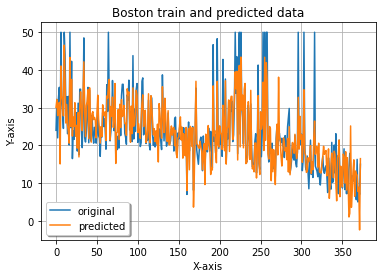

In [202]:
plt.plot(x1_ax, y1_orig, label="original")
plt.plot(x1_ax, y1_pred, label="predicted")
plt.title("Boston train and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  
 

In [203]:
test_data = model_reg_test.transform(test_df)
test_data.show(2)
 
x2_ax = range(0, test_data.count())
y2_pred = test_data.select("prediction").collect()
y2_orig = test_data.select("medv").collect()  

+--------------------+----+------------------+
|   Attributes_Scaled|medv|        prediction|
+--------------------+----+------------------+
|[0.00177627271180...|31.1|29.730986736255165|
|[0.00221648295862...|34.7| 30.71230224927109|
+--------------------+----+------------------+
only showing top 2 rows



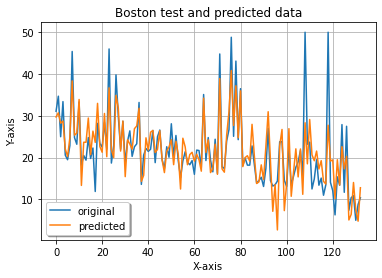

In [204]:
plt.plot(x2_ax, y2_orig, label="original")
plt.plot(x2_ax, y2_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  
 